使用費雪準則進行關鍵特徵篩選

In [1]:
# Step3_Feature_Selection using Fisher Criteria
# 使用費雪準則進行關鍵特徵篩選
# Author: Yuan-Jen Chang, Feng Chia University, imCLOUD CO.,LTD.
# Date: Sep. 18 2024

# Importing the libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Define directories
currentDirectory = '/content/drive/MyDrive/PHM_2024_Group6' # root Directory
healthyDataDirectory='/content/drive/MyDrive/PHM_2024_Group6/Data/Training/Healthy'
faulty2DataDirectory='/content/drive/MyDrive/PHM_2024_Group6/Data/Training/Faulty1'
faulty2DataDirectory='/content/drive/MyDrive/PHM_2024_Group6/Data/Training/Faulty2'
testingDataDirectory='/content/drive/MyDrive/PHM_2024_Group6/Data/Testing'
csvDirectory='/content/drive/MyDrive/PHM_2024_Group6/csv'
featureDirectory='/content/drive/MyDrive/PHM_2024_Group6/myfeature'


In [4]:
# 讀取檔案
os.chdir(featureDirectory) # Change directory to feature file directory
dataset = pd.read_csv('training_allFeature.csv') # (144, 80)
dataset1 = pd.read_csv('featureHealthy.csv') # (48, 80)
dataset2 = pd.read_csv('featureFaulty.csv') # (96, 80)
shape1=dataset1.shape
shape2=dataset2.shape
m1=shape1[0] # m1 = 48(featureHealthy)
m2=shape2[0] # m2 96(featureFaulty)
len_feature=shape1[1]  # Totally 80 features
feature_name=dataset1.columns.values.tolist() #取得特徵名稱

In [5]:
########## Get the healthy and faulty features from feature directory ##########
featureAll0 = np.zeros((m1, len_feature), dtype=np.double)
featureAll0=dataset.iloc[:, :].values  #Healthy and Faulty features
featureAll1 = np.zeros((40, len_feature), dtype=np.double)

featureAll1[0:20,:]=featureAll0[0:20,:] #Define Healthy features
featureAll1[20:40,:]=featureAll0[124:144,:] #Define Faulty features

meanFeatureAll=np.zeros((1, len_feature), dtype=np.double)
sdtFeatureAll=np.zeros((1, len_feature), dtype=np.double)
normFeatureAll=np.zeros((40, len_feature), dtype=np.double)
normFeatureHealthy = np.zeros((20, len_feature), dtype=np.double)
normFeatureFaulty = np.zeros((20, len_feature), dtype=np.double)

### Fisher score parameters ###
fisherScore = np.zeros((1, len_feature), dtype=np.double)  # Fisher score
normFisherScore = np.zeros((1, len_feature), dtype=np.double)  # Percentage of Fisher score
meanGoodFeature=np.zeros((1, len_feature), dtype=np.double)
meanBadFeature=np.zeros((1, len_feature), dtype=np.double)
varGoodFeature=np.zeros((1, len_feature), dtype=np.double)
varBadFeature=np.zeros((1, len_feature), dtype=np.double)


In [ ]:
########## Get the healthy and faulty features from feature directory ##########
featureAll0 = np.zeros((m1, len_feature), dtype=np.double)
featureAll0=dataset.iloc[:, :].values  #Healthy and Faulty features
featureAll1 = np.zeros((40, len_feature), dtype=np.double)

featureAll1[0:20,:]=featureAll0[0:20,:] #Define Healthy features
featureAll1[20:40,:]=featureAll0[120:140,:] #Define Faulty features

meanFeatureAll=np.zeros((1, len_feature), dtype=np.double)
sdtFeatureAll=np.zeros((1, len_feature), dtype=np.double)
normFeatureAll=np.zeros((40, len_feature), dtype=np.double)
normFeatureHealthy = np.zeros((20, len_feature), dtype=np.double)
normFeatureFaulty = np.zeros((20, len_feature), dtype=np.double)

### Fisher score parameters ###
fisherScore = np.zeros((1, len_feature), dtype=np.double)  # Fisher score
normFisherScore = np.zeros((1, len_feature), dtype=np.double)  # Percentage of Fisher score
meanGoodFeature=np.zeros((1, len_feature), dtype=np.double)
meanBadFeature=np.zeros((1, len_feature), dtype=np.double)
varGoodFeature=np.zeros((1, len_feature), dtype=np.double)
varBadFeature=np.zeros((1, len_feature), dtype=np.double)


In [6]:
########## Normalization ##########
# mean= 0, std = 1
for i in range(len_feature):
    meanFeatureAll[0,i]=np.mean(featureAll1[:,i])
    sdtFeatureAll[0,i]=np.std(featureAll1[:,i])
    for j in range(40): #拿來計算Fisher Score的bad feature不同(與Step3_Feature_Selection_2.py比較)
        normFeatureAll[j,i]=(featureAll1[j,i]-meanFeatureAll[0,i])/(sdtFeatureAll[0,i])


In [7]:
########## Calculate the Fisher Score ##########
for i in range(len_feature):
    meanGoodFeature[0,i]=np.mean(normFeatureAll[0:20,i])
    meanBadFeature[0,i]=np.mean(normFeatureAll[20:40,i])
    varGoodFeature[0,i]=np.var(normFeatureAll[0:20,i],ddof=1)
    varBadFeature[0,i]=np.var(normFeatureAll[20:40,i],ddof=1)
    fisherScore[0,i]=((meanGoodFeature[0,i]-meanBadFeature[0,i])**2)/(varGoodFeature[0,i]+varBadFeature[0,i])

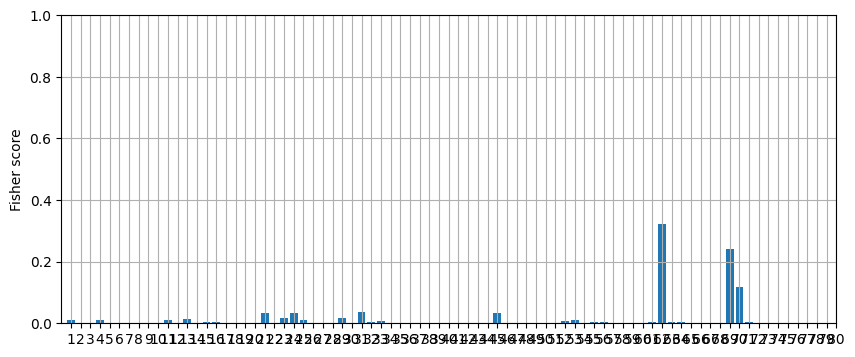

In [9]:
########## Plot the Fisher Score ##########
sumFisherScore=np.sum(fisherScore[0,0:len_feature])  #summation 0f all Fisher scores
for i in range(len_feature):
    normFisherScore[0,i] = fisherScore[0,i] / (sumFisherScore)
plt.figure( figsize = (10, 4))
labels = feature_name
mykey=[i for i in range(1, len_feature+1)] #mykey=[1,2,3,4,5,6,7,8,9,10]
plt.bar(mykey, normFisherScore[0,:], tick_label=mykey)
plt.axis([0, len_feature, 0, 1]) #set x and y - axis range
plt.ylabel('Fisher score')
plt.grid()
plt.show()

In [10]:
########## Sort the Fisher Score ##########
new_normFisherScore=dict(zip(labels,normFisherScore[0,:]))
items=new_normFisherScore.items()
sorted_normFisherScore=[[v[1],v[0]] for v in items]
sorted_normFisherScore.sort() #  ascend
sorted_normFisherScore.reverse() # descend

print(sorted_normFisherScore) # Change directory to csv root directory

# Result : Healthy+Faulty6:[0.38273689751147866, '22-v-mean'], [0.36531433602394886, '11-y-rms'], [0.09489924343299704, '5-x-skewness'], [0.044987088690163615, '1-x-rms'], [0.025924309863158287, '3-x-kurtosis']

[[0.3236335927385616, '62-voltage-mean'], [0.24199373849348366, '69-voltage-Shape Factor'], [0.1166084783608316, '70-voltage-Clearance Factor'], [0.03805305130289373, '31-y-Energy'], [0.03384296855973248, '45-z-skewness'], [0.033793510650839055, '21-y-rms'], [0.03378790174975462, '24-y-std'], [0.016870242524583974, '29-y-Shape Factor'], [0.016204556853667024, '23-y-kurtosis'], [0.013141051527792859, '13-x-FFT1X'], [0.011853876095785266, '25-y-skewness'], [0.010956075297361706, '11-x-Energy'], [0.010075998831260528, '1-x-rms'], [0.010075569637710108, '4-x-std'], [0.00918913861755969, '53-z-FFT1X'], [0.008046954238733792, '33-y-FFT1X'], [0.007038766060859632, '52-z-Entropy'], [0.00429303184177507, '64-voltage-std'], [0.003686612704205689, '16-x-FFT4X'], [0.003487950130109057, '61-voltage-rms'], [0.003407376919022957, '71-voltage-Energy'], [0.0034059331332940528, '56-z-FFT4X'], [0.0033820070190276165, '55-z-FFT3X'], [0.0030069194478383717, '63-voltage-kurtosis'], [0.0026717127010769943, '

In [ ]:
for item in sorted_normFisherScore:
    print(item)

[0.30576024654319206, '62-voltage-mean']
[0.2979120255163567, '69-voltage-Shape Factor']
[0.10911914553147935, '70-voltage-Clearance Factor']
[0.036906741245645386, '31-y-Energy']
[0.03238130527241287, '21-y-rms']
[0.032375806363469435, '24-y-std']
[0.02186181601348188, '45-z-skewness']
[0.015479262843397247, '29-y-Shape Factor']
[0.015043917856356134, '23-y-kurtosis']
[0.011464616409627072, '13-x-FFT1X']
[0.010970050529598693, '25-y-skewness']
[0.009515721710880042, '53-z-FFT1X']
[0.008055212356038463, '33-y-FFT1X']
[0.007140967233990332, '1-x-rms']
[0.007140520831907195, '4-x-std']
[0.006974693695848624, '11-x-Energy']
[0.006109563456503934, '52-z-Entropy']
[0.005413672410341046, '64-voltage-std']
[0.004435187355556714, '61-voltage-rms']
[0.004317737651905563, '71-voltage-Energy']
[0.003428918476744195, '16-x-FFT4X']
[0.0033719876190703713, '63-voltage-kurtosis']
[0.0031681438132624955, '56-z-FFT4X']
[0.003051387813392595, '55-z-FFT3X']
[0.002947950376495181, '32-y-Entropy']
[0.00211

In [11]:
# 前五大關鍵特徵總和
firstThreeFeatures = 0
firstFiveFeatures = 0
firstSixFeatures = 0

for i in range(3):
  firstThreeFeatures = firstThreeFeatures + sorted_normFisherScore[i][0]
print("%12s %3.2f %1s" % ('前三大關鍵特徵總和 = ',firstThreeFeatures*100 , '%'))

for i in range(5):
  firstFiveFeatures = firstFiveFeatures + sorted_normFisherScore[i][0]
print("%12s %3.2f %1s" % ('前五大關鍵特徵總和 = ',firstFiveFeatures*100 , '%'))

for i in range(6):
  firstSixFeatures = firstSixFeatures + sorted_normFisherScore[i][0]
print("%12s %3.2f %1s" % ('前六大關鍵特徵總和 = ',firstSixFeatures*100 , '%'))

os.chdir(currentDirectory) # Change directory to csv root directory

########### End ###########


前三大關鍵特徵總和 =  68.22 %
前五大關鍵特徵總和 =  75.41 %
前六大關鍵特徵總和 =  78.79 %
